##### 偵測鍵盤行為
使用 OpenCV 建立視窗後，除了開啟圖片進行預覽，也可透過視窗偵測鍵盤按鍵，當按下按鍵時，即時取得該按鍵的 ASCII 代碼，\
藉由這種偵測鍵盤行為的方法，實現影像與鍵盤的互動 ( 例如透過鍵盤，直接調整影像的亮度或飽和度...等 )。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 取得鍵盤按鍵的 ASCII 代碼 
透過 cv2.waitKey 的方法，能夠在按下鍵盤時取得該按鍵的 ASCII 代碼，\
取得代碼後再透過 Python 內建的 chr 方法就能將 ASCII 轉換為該按鍵所代表的 Unicode 字元。

參考：[chr(x)](https://steam.oxxostudio.tw/category/python/basic/builtin-string.html#a6)

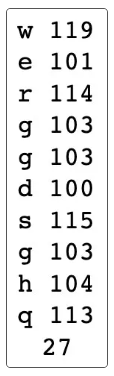

In [ ]:
import cv2

cv2.namedWindow('oxxostudio')  # 建立一個名為 oxxostudio 的視窗

while True:
    keycode = cv2.waitKey(0)   # 持續等待，直到按下鍵盤按鍵才會繼續
    c = chr(keycode)           # 將 ASCII 代碼轉換成真實字元
    print(c, keycode)          # 印出結果
    if keycode == 27:
        break                  # 如果代碼等於 27，結束迴圈 ( 27 表示按鍵 ESC )

cv2.destroyAllWindows()

##### 鍵盤按鍵的 ASCII 代碼表 
下方[圖表](https://www.asciitable.com/)列出常用的鍵盤按鍵 ASCII 代碼對照表 ( Dec 欄位 )：

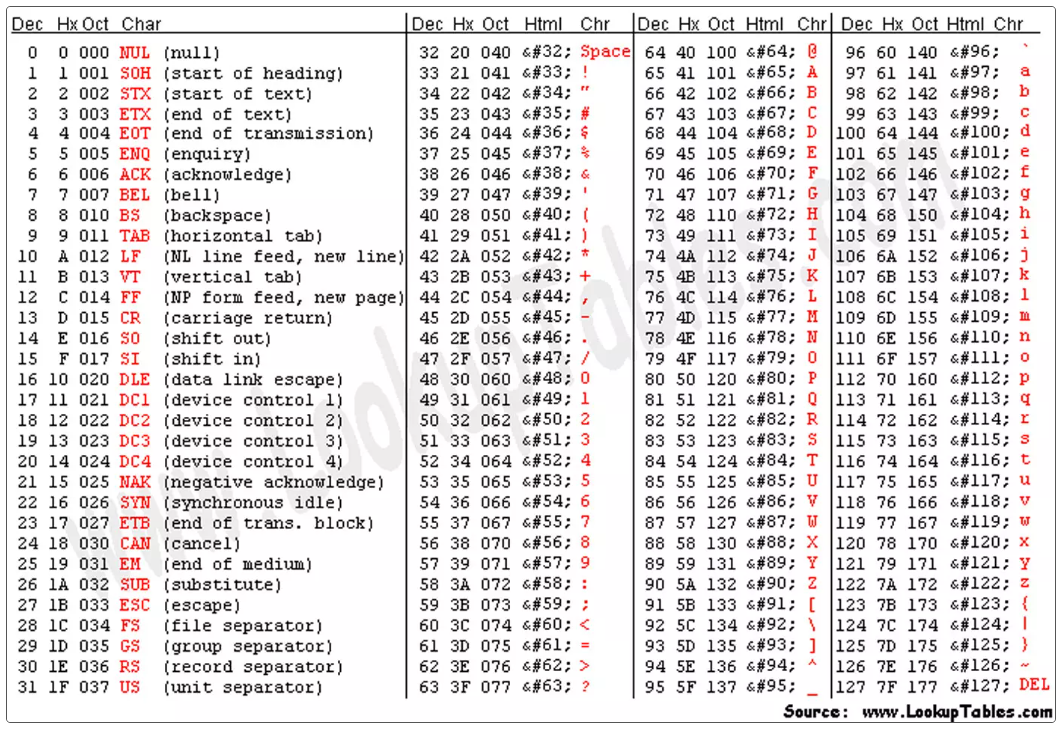

##### 透過鍵盤，調整影像的亮度和對比度 
延伸「[調整影像的對比和亮度](https://steam.oxxostudio.tw/category/python/ai/opencv-adjust.html)」範例，將程式修改為按下鍵盤的上下左右時，可以調整影像的亮度和對比度。

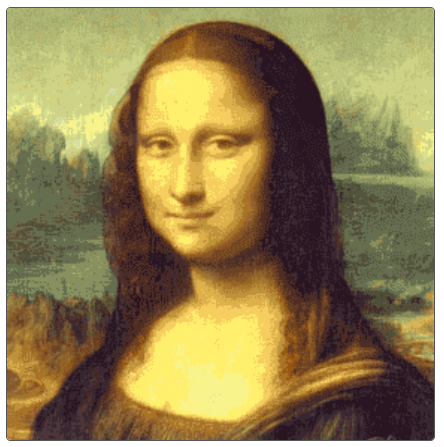

In [3]:
import cv2
import numpy as np

img = cv2.imread('image\\Dog.jpg')

# 定義調整亮度對比的函式  
def adjust(image, contrast, brightness):                           # 定義調整亮度對比的函式
    output = image * (contrast / 100 + 1) - contrast + brightness  # 轉換公式
    output = np.clip(output, 0, 255)                               # 將數值限制在 0~255 之間
    output = np.uint8(output)                                      # 轉換成 8 位元無符號整數
    return output                                                  # 回傳處理後的圖片

contrast = 0    # 初始化要調整對比度的數值
brightness = 0  # 初始化要調整亮度的數值
cv2.imshow('oxxostudio', img) 

while True:
    keycode = cv2.waitKey(0)   # 等待按鍵輸入
    if keycode == ord('w'):    # 按下 W 鍵
        brightness += 5        # 亮度增加 5
    elif keycode == ord('s'):  # 按下 S 鍵
        brightness -= 5        # 亮度減少 5
    elif keycode == ord('d'):  # 按下 D 鍵
        contrast += 5          # 對比度增加 5
    elif keycode == ord('a'):  # 按下 A 鍵
        contrast -= 5          # 對比度減少 5
    elif keycode == ord('q'):  # 按下鍵盤的「q」，恢復預設值
        contrast, brightness = 0, 0                 # 將對比度和亮度的值都設為 0
    elif keycode == 27:                             # 按下鍵盤的「Esc」，退出
        break

    show = img.copy()                          # 複製原始圖片
    show = adjust(show, contrast, brightness)  # 根據亮度和對比度的調整值，輸出新的圖片
    cv2.imshow('oxxostudio', show)             # 顯示調整後的圖片

cv2.destroyAllWindows()